# Simulating the Modulation Curve Numerically

The next equation is going to be simulated:

$$I_k (x,y) = exp(\lambda_k)*[a_0(x,y)+a_1(x,y)*cos(\frac{2\pi k}{M}+\Phi(x,y) + step\_error_k)]+\eta_k(x,y)$$

Where $I(x,y)$ is the intensity in each $(x,y)$ pixel, $\lambda$ is the mean value of a normal distribution to simulate the Dose Fluctuations between each acquisition. The $step\_error$ simulates errors in the phase step estimation and $\eta$ the noise. The parameters related to the Differential Phase Contrast (DPC) and Attenuation or Transmission (T) images are $a_0(x,y)$, $a_1(x,y)$ and $\Phi(x,y)$. 

First it is needed to define the object we want to simulate, there are only simple objects like a sphere or a cylinder.

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fresnel number: 0.16131088581590397.


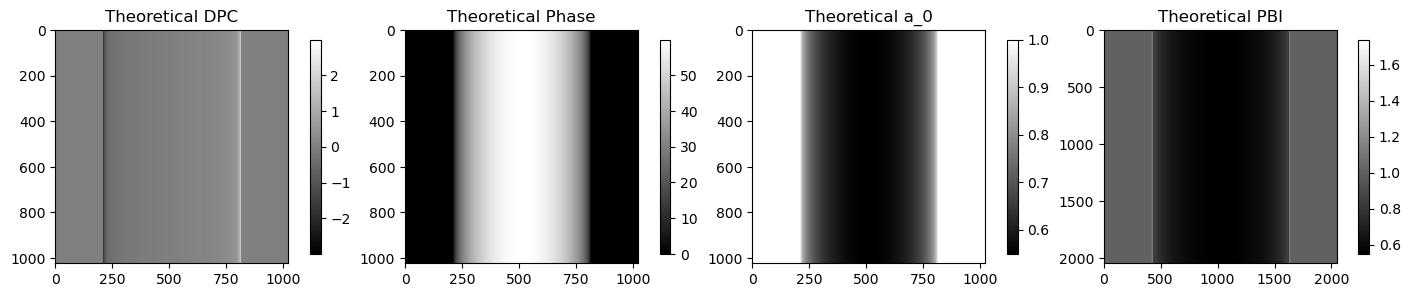

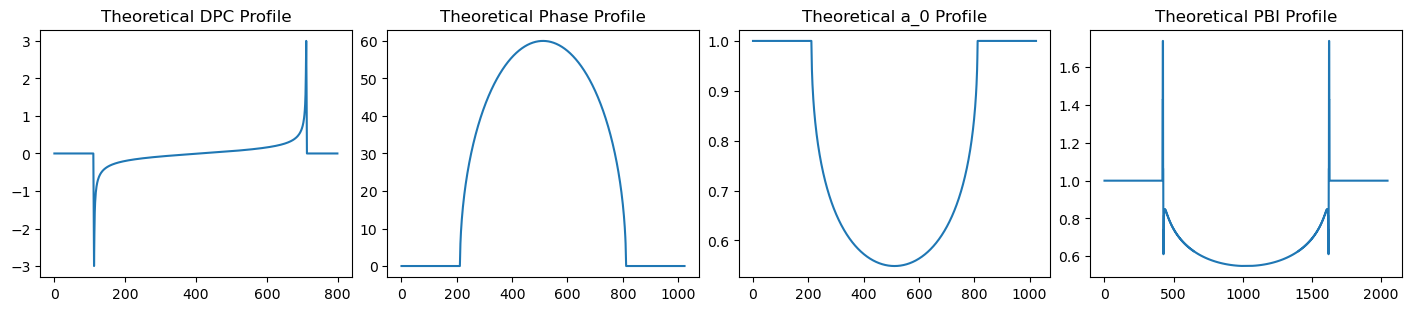

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import Objects as obj
import tifffile as tiff

import simulation as sim

n = 1024
radius = 300 # um
pixel_size = 1 #um
delta = 1E-1 # Real part of refractive index multiplied by 2*pi/wavelength
beta = 1E-3 # The imaginary part  of refractive index multiplied by 2*pi/wavelength

Object = obj.Cylinder(n, radius, pixel_size, delta, beta,'Vertical')

#Object = obj.Wedge(n, 300,400, pixel_size, delta, beta)


PG = Object.Obtain_Phase_Gradient(axis = 1)
Lp = Object.Obtain_Phase_Laplacian()
Phase = Object.Obtain_Phase_Distribuction()
a0 = Object.a0_Distribution()
PBI_theor = Object.PBI_Theoretical_near_field(distance = 10, energy = 20, M = 2)
#imageio.imwrite('Simulation/Phase.tif', Phase)

fig, ax = plt.subplots(1, 4, constrained_layout = True, figsize = (14, 14))
#fig.tight_layout()

DPC = ax[0].imshow(PG,  'gray')
ax[0].title.set_text('Theoretical DPC')
fig.colorbar(DPC, ax = ax[0], fraction=0.046, pad=0.04)

P = ax[1].imshow(Phase,  'gray')
ax[1].title.set_text('Theoretical Phase')
fig.colorbar(P, ax = ax[1], fraction=0.046, pad=0.04)

A0 = ax[2].imshow(a0,  'gray')
ax[2].title.set_text('Theoretical a_0')
fig.colorbar(A0, ax = ax[2], fraction=0.046, pad=0.04)

PBI_THEOR = ax[3].imshow(PBI_theor,  'gray')
ax[3].title.set_text('Theoretical PBI')
fig.colorbar(PBI_THEOR, ax = ax[3], fraction=0.046, pad=0.04)
plt.show()
#fig.savefig('Theoretical_Sphere.png')

fig, ax = plt.subplots(1, 4, constrained_layout = True, figsize = (14, 3))
DPC_Profile = ax[0].plot(PG[n//2, 100:900])
ax[0].title.set_text('Theoretical DPC Profile')

P_Profile = ax[1].plot(Phase[n//2, :])
ax[1].title.set_text('Theoretical Phase Profile')

A0_Profile =ax[2].plot(a0[n//2, :])
ax[2].title.set_text('Theoretical a_0 Profile')

PBI_THEOR_Profile =ax[3].plot(PBI_theor[n//2, :])
ax[3].title.set_text('Theoretical PBI Profile')
plt.show()
#fig.savefig('Theoretical_Sphere_Profiles.png')

Now we can simulate the Modulation Curves based on the previous equation.

In [2]:
noise_mean = 0.1
error_steps_mean = 0.00
error_dose_mean = 0.02
Moire = False
Phase_steps = 20
Images, Images_reference = sim.Simulation(Object, Phase_steps, noise_mean, error_steps_mean, error_dose_mean, Moire)
Images = np.asarray(Images)
Images_reference = np.asarray(Images_reference)
#print(Images)
Images *= 400
Images_reference *= 400

fig, ax = plt.subplots(2, 2, constrained_layout = True, figsize = (9, 9))
#fig.tight_layout()

Imag1 = ax[0,0].imshow(Images[0,:,:],  'gray')
ax[0,0].title.set_text('Object Image 1')
fig.colorbar(Imag1, ax = ax[0,0], fraction=0.046, pad=0.04)

RefImage1 = ax[0,1].imshow(Images_reference[0,:,:],  'gray')
ax[0,1].title.set_text('Reference Image 1')
fig.colorbar(RefImage1, ax = ax[0,1], fraction=0.046, pad=0.04)

Imag2 = ax[1,0].imshow(Images[4,:,:],  'gray')
ax[1,0].title.set_text('Object Image 2')
fig.colorbar(Imag2, ax = ax[1,0], fraction=0.046, pad=0.04)

RefImage2 = ax[1,1].imshow(Images_reference[4,:,:],  'gray')
ax[1,1].title.set_text('Reference Image 2')
fig.colorbar(RefImage2, ax = ax[1,1], fraction=0.046, pad=0.04)
plt.show()

plt.scatter(np.linspace(0,2*np.pi, Phase_steps), Images[:,n//2, n//2],color= "blue",marker= "o", label = 'Object')
plt.scatter(np.linspace(0,2*np.pi, Phase_steps), Images_reference[:,n//2, n//2], color= "red",marker= "*", label = 'Reference')
plt.legend(loc='best')
plt.xlabel('Phase step')
plt.ylabel('Intensity')
plt.title(f'Modulation Curve at pixel ({n//2},{n//2})')
plt.show()
#fig.savefig('Modulation_Curve.png')

TypeError: GeometricObject.Obtain_Phase_Gradient() missing 1 required positional argument: 'axis'

We can save the results into the **Simulation** folder or modifying the path, wherever you want.

In [ ]:
filename_object_images = 'Sphere'
filename_reference_images = 'Sphere_reference'
tiff.imwrite('Simulation/'+str(filename_object_images)+'.tif')
tiff.imwrite('Simulation/'+str(filename_reference_images)+'.tif')
#
#imageio.volwrite('Simulation/'+str(filename_object_images)+'.tif', Images)
#imageio.volwrite('Simulation/'+str(filename_reference_images)+'.tif', Images_reference)

399.99749999218744


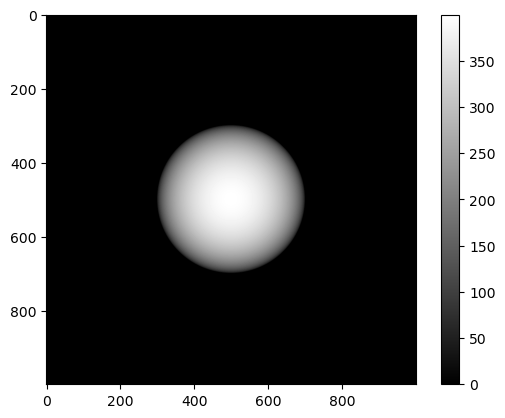

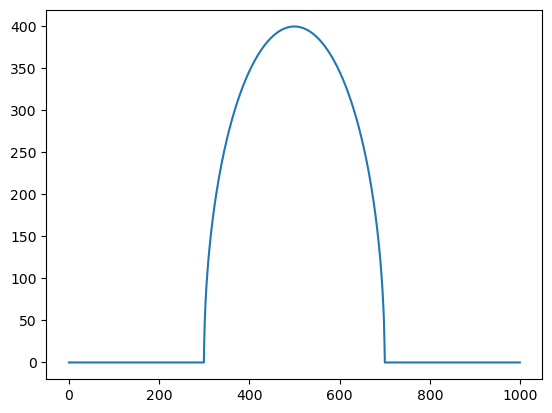

161.2580747332259


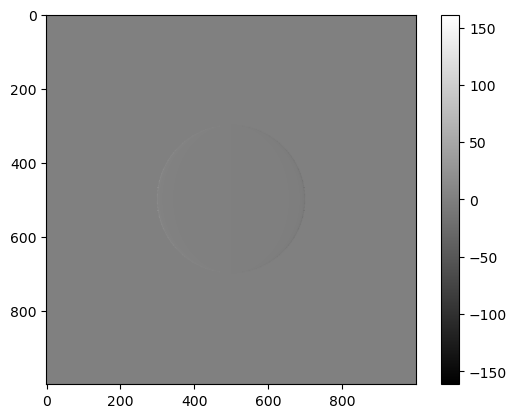

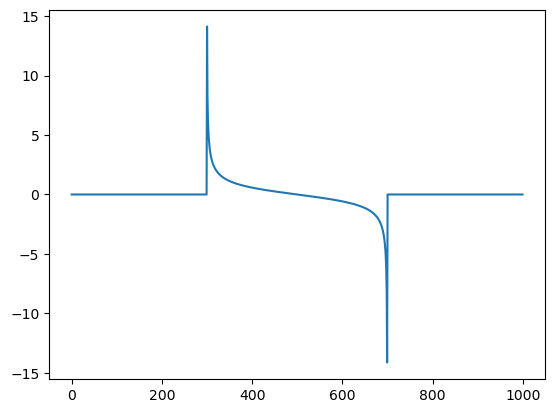

0.0


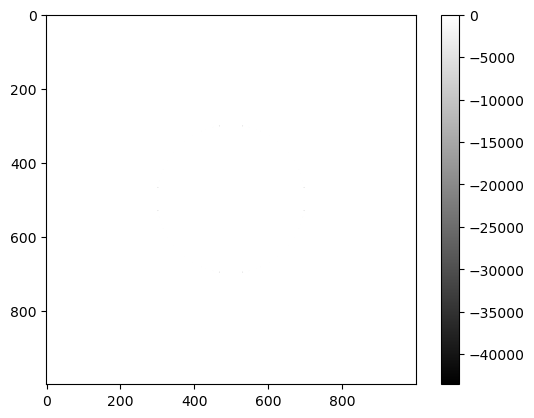

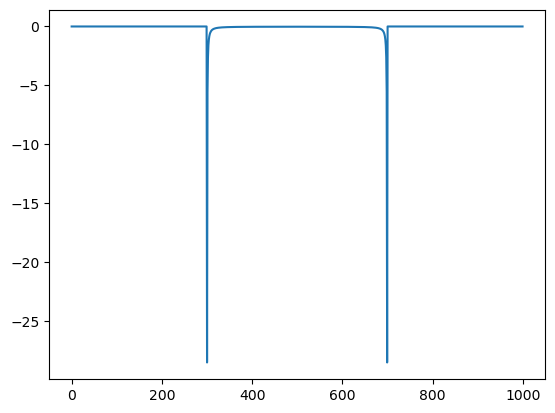

In [33]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
pixel_size = 1
radius = 200
x,y = np.mgrid[(-n-0)//2 : (n-0)//2, (-n-0)//2 : (n-0)//2]
x = (x+0.5)*pixel_size 
y = (y+0.5)*pixel_size
thickness = np.zeros((n,n))
gradient = np.zeros((n,n))
laplacian = np.zeros((n,n))
sph = np.where(x**2+y**2<radius**2)
#image[sph] = 2*(-2/np.sqrt(radius**2 - x[sph]**2 -y[sph]**2)+ 2*x[sph]**2/(2*np.sqrt(radius**2 - x[sph]**2 -y[sph]**2)**3)+ 2*y[sph]**2/(2*np.sqrt(radius**2 - x[sph]**2 -y[sph]**2)**3))
laplacian[sph] = 2*((-2*radius**2 + x[sph]**2 + y[sph]**2)/(radius**2 - x[sph]**2 - y[sph]**2)**(3/2))  #Laplacian
gradient[sph] = -y[sph]/np.sqrt(radius**2-x[sph]**2-y[sph]**2) #gradient
thickness[sph] = 2*np.sqrt(radius**2-x[sph]**2-y[sph]**2)

print(np.max(thickness))
plt.imshow(thickness, 'gray')
plt.colorbar()
plt.show()

plt.plot(thickness[500,:])
plt.show()

print(np.max(gradient))
plt.imshow(gradient, 'gray')
plt.colorbar()
plt.show()

plt.plot(gradient[500,:])
plt.show()

print(np.max(laplacian))
plt.imshow(laplacian, 'gray')
plt.colorbar()
plt.show()

plt.plot(laplacian[500,:])
plt.show()